In [9]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv('./data/Boston.csv')
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
X = boston.drop(["medv"], axis=1)
Y = boston["medv"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [4]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train) # fit_transform (uses mean) vs transform (does not use mean)
x_test = scalar.transform(x_test)

In [5]:
model = tf.keras.Sequential()
layer = tf.keras.layers

model.add(layer.Dense(128, input_shape=(x_train.shape[1],), activation='linear', name='input'))
model.add(layer.Dense(64, activation='relu', name='hidden'))
model.add(layer.Dense(1, activation='linear', name='output'))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1920      
                                                                 
 hidden (Dense)              (None, 64)                8256      
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 582.6686 - mae: 22.2154 - val_loss: 473.6476 - val_mae: 20.3076
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 501.0676 - mae: 20.4586 - val_loss: 407.5233 - val_mae: 18.7021
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 407.2090 - mae: 18.0965 - val_loss: 323.0235 - val_mae: 16.3670
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 297.4156 - mae: 14.9576 - val_loss: 230.7212 - val_mae: 13.0991
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 195.5926 - mae: 11.3170 - val_loss: 167.1814 - val_mae: 10.3612
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 136.5072 - mae: 9.1587 - val_loss: 144.3594 - val_mae: 8.9154
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 110.2788 - mae: 8.2976 - val_loss: 142.5707 - val_mae: 8.9278
Epoch 8/100
12/12 [=========================

In [11]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [13]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 18.515383077449112
Mean Absolute Error: 3.3693674143622903


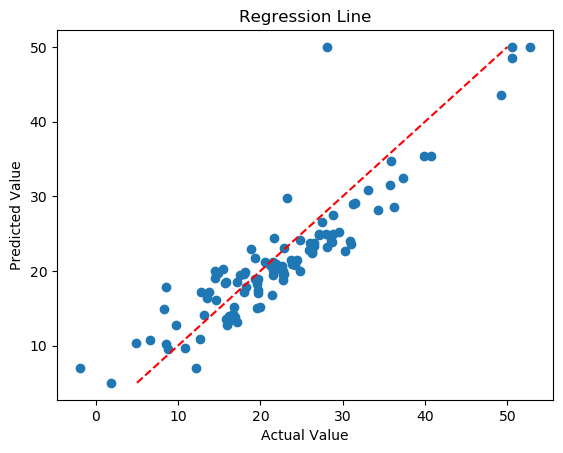

In [14]:
plt.scatter(y_pred, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Regression Line')
plt.show()